In [1]:
# for database connections
import sqlalchemy
from sqlalchemy import create_engine, inspect, text

# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SQL_USERNAME = "postgres"
SQL_PASSWORD = "Ollie!0515" # change this
SQL_IP = "localhost"
PORT = 5432
DATABASE = "Project_2_group_08" # change this

In [3]:
connection_string = f"postgresql+psycopg2://{SQL_USERNAME}:{SQL_PASSWORD}@{SQL_IP}:{PORT}/{DATABASE}"
engine = create_engine(connection_string)

In [4]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

contacts
contact_id INTEGER
first_name VARCHAR(30)
last_name VARCHAR(30)
email VARCHAR(100)

campaign
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(100)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(20)
backers_count INTEGER
country VARCHAR(10)
currency VARCHAR(10)
launch_date TIMESTAMP
end_date TIMESTAMP
category_id VARCHAR(20)
subcategory_id VARCHAR(20)

category
category_id VARCHAR(20)
category VARCHAR(50)

subcategory
subcategory_id VARCHAR(20)
subcategory VARCHAR(50)



In [5]:
#sabina query

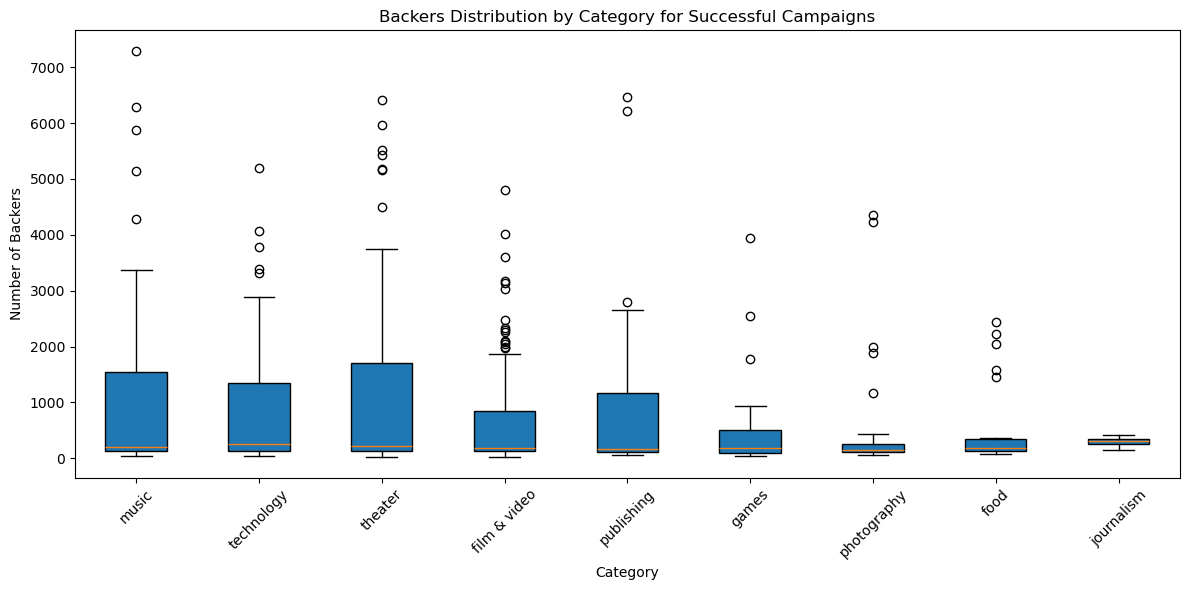

In [23]:
#seven query
# Load the data from the provided CSV files
campaign_df = pd.read_csv('Resources/campaign.csv')
category_df = pd.read_csv('Resources/category.csv')

# Merging campaign data with category data to get category names
campaign_category_df = campaign_df.merge(category_df, on='category_id')

# Filtering the data for successful campaigns
successful_campaigns_df = campaign_category_df[campaign_category_df['outcome'] == 'successful']

# Plotting the box plot for backers distribution by category for successful campaigns
plt.figure(figsize=(12, 6))
plt.boxplot(
    [successful_campaigns_df[successful_campaigns_df['category'] == category]['backers_count'] 
     for category in successful_campaigns_df['category'].unique()],
    labels=successful_campaigns_df['category'].unique(),
    patch_artist=True
)
plt.xlabel('Category')
plt.ylabel('Number of Backers')
plt.title('Backers Distribution by Category for Successful Campaigns')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('backers_distr_boxplot.png')

plt.show()

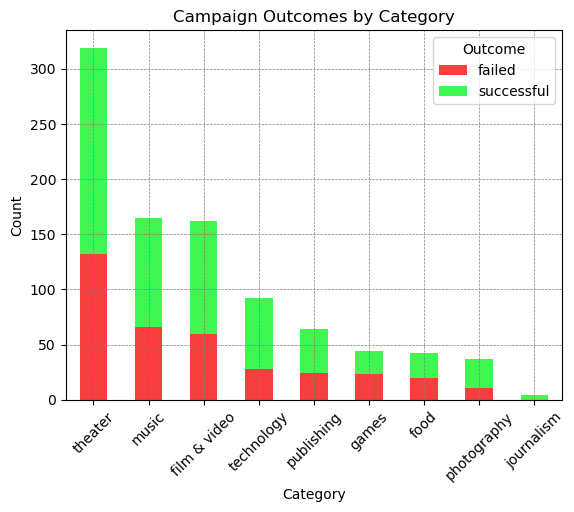

In [8]:
#hannah query

# Loading data from the Category and Campaign tables
category_df = pd.read_sql_query("SELECT * FROM category", engine)
campaign_df = pd.read_sql_query("SELECT * FROM campaign", engine)

# Merge the dataframes on category_id
merged_df = pd.merge(campaign_df, category_df, on='category_id')

#filtering out canceled and live rows 
filtered_viz = merged_df[~merged_df['outcome'].isin(['canceled', 'live'])]

# Group by category, outcome and count 
outcome_counts = filtered_viz.groupby(['category', 'outcome']).size().unstack(fill_value=0)

# Sorting data by total counts (desc)
outcome_counts['total'] = outcome_counts.sum(axis=1)
outcome_counts = outcome_counts.sort_values(by='total', ascending=False)
outcome_counts = outcome_counts.drop(columns='total')  # Drop the total column after sorting

#Colors 
colors = ['#F64040', '#40F650']  # Example colors for each outcome

#Plotting
ax = outcome_counts.plot(kind='bar', stacked=True, color=colors)

#Plot Details
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Campaign Outcomes by Category')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

#saving as png just bc
plt.savefig('campaign_outcomes_bar.png')

# Show the plot
plt.show()


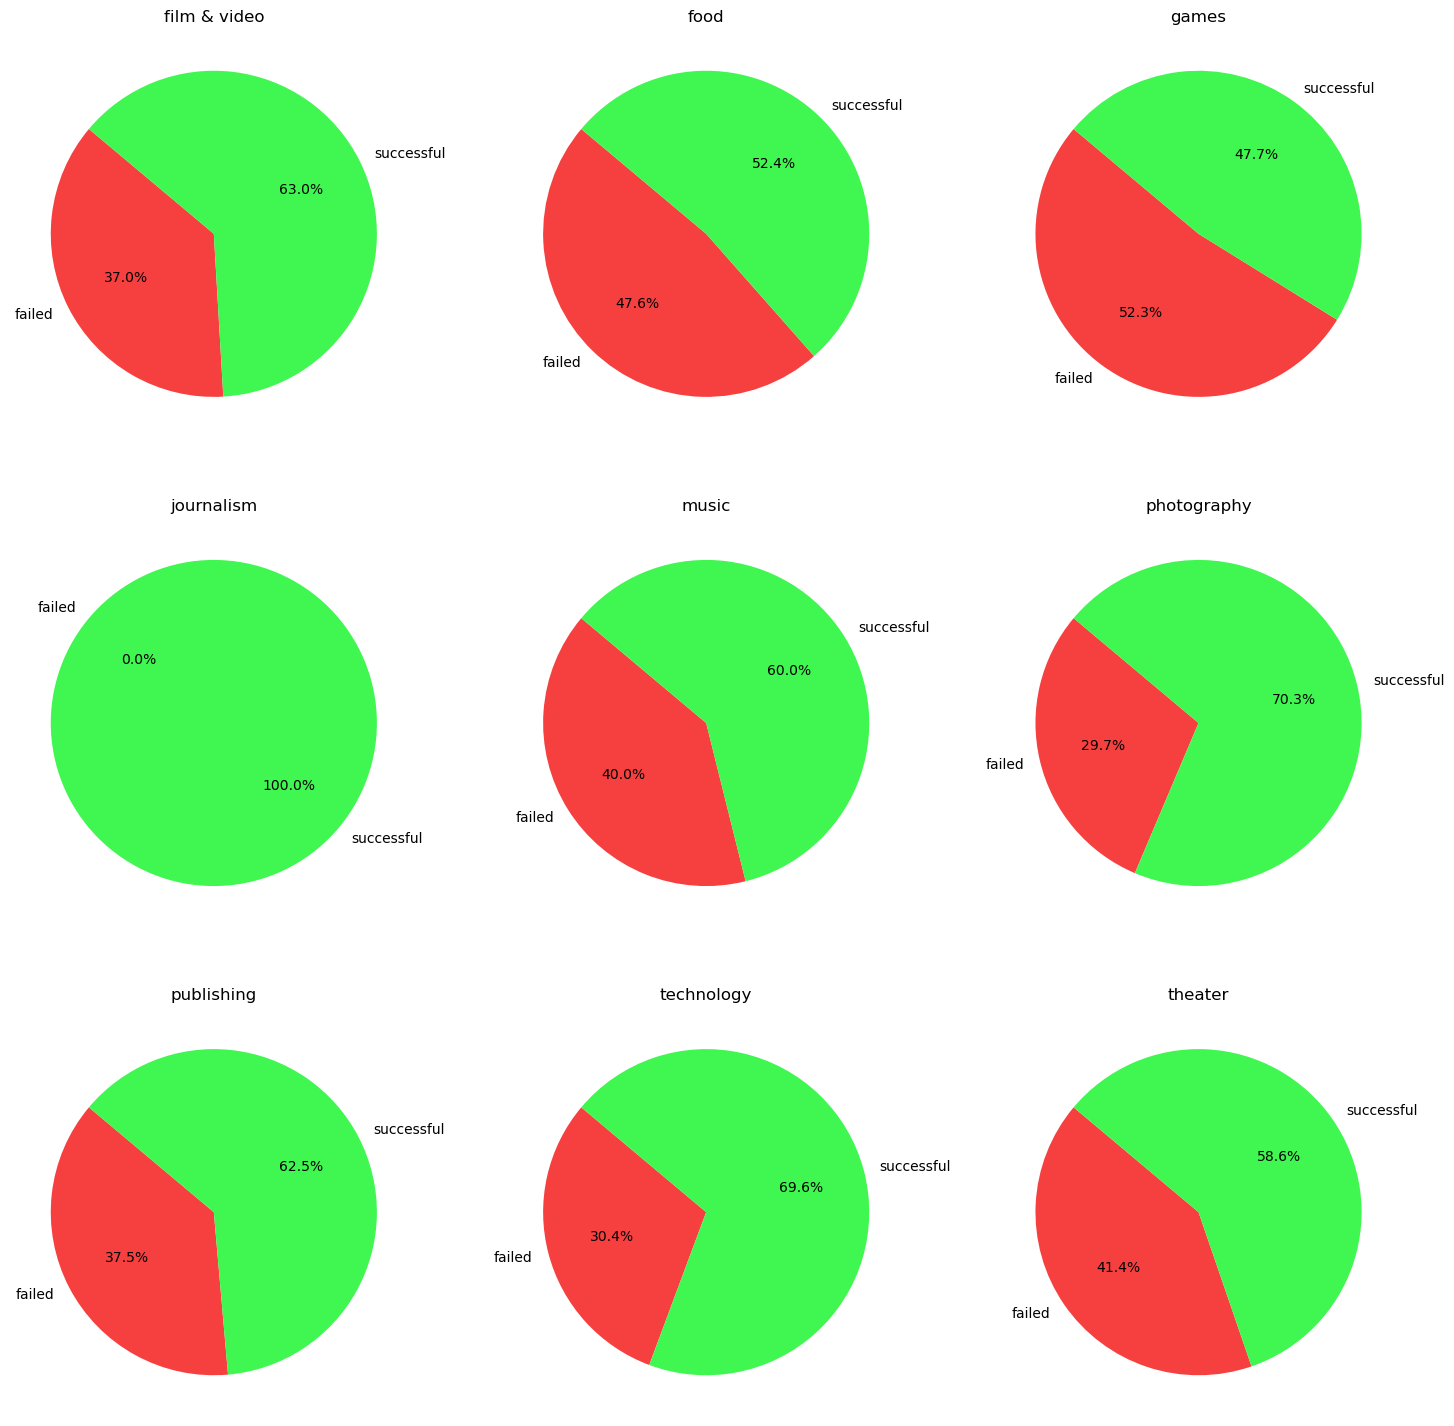

In [25]:
# Loading data from the Category and Campaign tables
category_df = pd.read_sql_query("SELECT * FROM category", engine)
campaign_df = pd.read_sql_query("SELECT * FROM campaign", engine)

# Merge the dataframes on category_id
merged_df = pd.merge(campaign_df, category_df, on='category_id')

# Filter out canceled and live rows
filtered_viz = merged_df[~merged_df['outcome'].isin(['canceled', 'live'])]

# Group by category, outcome, and count 
outcome_counts = filtered_viz.groupby(['category', 'outcome']).size().unstack(fill_value=0)

#colors
colors = ['#F64040', '#40F650']

# Number of categories
num_categories = len(outcome_counts.index)

#Arranging charts to print into 3 columns
num_cols = 3
num_rows = (num_categories + num_cols - 1) // num_cols  # Ensures enough rows to accommodate all categories

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))

# Flattening axes array
axes = axes.flatten()

#for loop to loop through each category 
for i, category in enumerate(outcome_counts.index):
    outcome_data = outcome_counts.loc[category]
    
    #creating pie chart
    axes[i].pie(outcome_data, labels=outcome_data.index, colors=colors, autopct='%1.1f%%', startangle=140)
    
    #title
    axes[i].set_title(category)
    

# Save the figure as a PNG file
plt.savefig('campaign_outcomes_pie.png')

# Show the plot
plt.show()
